# Casino Campaign Case Study

* Author: Ioannis Vougias
* Email: ioannisvougias@hotmail.com

This notebook contains an analysis on a case study of a casino marketing campaign.

Case study details:

''Our CRM team decided to run a Casino campaign for the period 25/01/2020 and 04/02/2020.
In an effort to evaluate the campaign, CRM team has asked to analyze the impact and create a brief presentation with the findings. 

In order to proceed with the evaluation, CRM provided the below info.

Campaign Details:
* Campaign ran for the period of 25/01/2020 and 04/02/2020
* Target of the campaign were customers in Segment B and age group 25-40

In [1]:
# Import necessary libraries
from datetime import date
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import seaborn as sns


# Read data from CSV files with the appropriate separators
casinos = pd.read_csv('Casino.csv', sep = ';', parse_dates=['Casino_DateCreation_ID'])

customers = pd.read_csv('Customer.csv', sep = ';', parse_dates=['Customer_Birthday_Date'])

segments = pd.read_csv('Segments.csv', sep = ',', dtype = {'Segment_Group': 'string'})

transactions = pd.read_csv('Transactions.csv', sep = ',', 
                           dtype = {'Transaction_Product_Name': 'string'},
                           parse_dates=['Transaction_DateCreation_ID'])

In [2]:
#Merge segments dataframe to customers dataframe to have customers and their corresponding segment
customers_segments = pd.merge(customers, segments, on='Customer_ID')

#Create a dataframe with the information for customers on segment 'B'
customers_b = customers_segments[customers_segments['Segment_Group'] == 'B']

In [3]:
#Apply the condition that targeted customers are aged between 25-40 y.o.
start_date = '1995-01-25'

#Until the last day before the customer turns 41, as the campaign is until 40 y.o.
end_date =  '1979-01-26'

#Create age mask to have only customers between 25-40 y.o
age_mask = (customers_b['Customer_Birthday_Date'] <= start_date ) & (customers_b['Customer_Birthday_Date'] >= end_date)

#Apply the mask
customers_b = customers_b.loc[age_mask]

In [4]:
#Create variables with starting and ending day of the campaign
start_date = '2020-01-25'
end_date = '2020-02-04'

#Create date mask to have only the casino activity on the days between 25/01/2020 and 04/02/2020
date_mask = (casinos['Casino_DateCreation_ID'] >= start_date ) & (casinos['Casino_DateCreation_ID'] <= end_date)

casinos_during = casinos.loc[date_mask]

In [5]:
#Merge the activity with the customers from segment B aged between 25-40 y.o
casino_campaign = pd.merge(casinos_during, customers_b, left_on='Casino_Customer_ID', right_on='Customer_ID')

----------------------------------------

## Measured KPIs

1. Gross revenue
2. Customer Segmentation
3. Average Customer Spend
4. Customer Retention
5. Mean Customer Visits

### 1. Gross revenue
This KPI represents the total amount of money that the casino has made from its customers' bets, minus the total amount of money that the customers have won. This is an important metric to track because it shows the overall profitability of the casino.

In [6]:
#Calculate casino turnover for the duration of the campaign, round the number to 2 decimals
Casino_Turnover = casino_campaign['Casino_Turnover'].sum().round(2)

#Calculate casino winnings for the duration of the campaign, round the number to 2 decimals
Casino_Winnings = casino_campaign['Casino_Winnings'].sum().round(2)

#Calculate casino revenue for the duration of the campaign, round the number to 2 decimals
Gross_revenue_during  = Casino_Turnover - Casino_Winnings
Gross_revenue_during.round(2)

50450.05

### 2. Customer Segmentation
This KPI measures the effectiveness of the campaign in reaching its target audience of customers in Segment B and age group 25-40. It is calculated by comparing the number of customers in the target audience who visited the casino during the campaign period to the total number of customers in the target audience.

In [7]:
#Count total customer number for segment B, aged between 25-40 y.o.
all_cust_b = customers_b['Customer_ID'].unique().size

#Count total customer number for segment B, aged between 25-40 y.o that was active during the campaign
campaign_active_cust_b = casino_campaign['Casino_Customer_ID'].unique().size

#Calculate the Customer Segmentation percentage
active_per = (campaign_active_cust_b / all_cust_b) * 100

#Print Customer Segmentation
print(round(active_per),"%")

93 %


### 3. Average Customer Spend

This KPI measures the average amount that unique targeted customers  spend during the campaign period to the casino. It is calculated by dividing the total Casino_Turnover by the total number of unique Customer_IDs.

In [8]:
#Calculate average customer spend for the duration of the campaign
avg_spend = Casino_Turnover / campaign_active_cust_b

avg_spend.round(2)

109.64

### 4. Customer Retention

This KPI measures the percentage of customers who continue to visit the casino after the campaign period. It is calculated by comparing the number of unique Customer_IDs of the segment we target in the Casino.csv file who visited the casino during the campaign period to the number of unique Customer_IDs in the Casino.csv file who visited the casino after the campaign period.

In [9]:
#Create variable with the day after the campaign
start_date = '2020-02-05'

#Create age mask to have only the activity on the days after the campaign
date_mask_after = (casinos['Casino_DateCreation_ID'] >= start_date )

#Apply the mask
casinos_after = casinos.loc[date_mask_after]

#Merge the activity with the customers from segment B aged between 25-40 y.o
casino_after_campaign = pd.merge(casinos_after, customers_b, left_on='Casino_Customer_ID', right_on='Customer_ID')

In [10]:
#Calculate total active customers from segment B, aged 25-4 y.o, after the campaign
no_campaign_active_cust_b = casino_after_campaign['Casino_Customer_ID'].unique().size

no_campaign_active_cust_b

2909

In [11]:
#Calculation retention percentage
retention = (no_campaign_active_cust_b) / (campaign_active_cust_b) * 100

print(round(retention),'%')

56 %


### 5. Mean Customer Visits

In [12]:
customer_visits = casino_campaign.groupby('Casino_Customer_ID')['Casino_Customer_ID'].count().reset_index(name='Customer Visits')
mean_customer_visits = customer_visits['Customer Visits'].mean()
print('Mean Customer Visits are:',round(mean_customer_visits))

Mean Customer Visits are: 8


In [13]:
median_customer_visits = customer_visits['Customer Visits'].median()
print('Median Customer Visits are:',round(median_customer_visits))

Median Customer Visits are: 3


--------------------------

## Evaluation of the campaign

First let's find answers to some basic questions about the campaign.

1. How many customers were targeted by the campaign?
2. How many customers made a transaction during the campaign period?
3. What was the average transaction amount for these customers?
4. What was the total gross revenue for the campaign period?
5. What was the average gross revenue per customer for the campaign period?
6. How does the gross revenue for the campaign period compare to the rest of the first two months of 2020?

### 1. How many customers were targeted by the campaign?

In [14]:
#Find unique customer ID from the segmented dataframe
all_cust_b = customers_b['Customer_ID'].unique().size

#Total customers targeted by the campaign
print('\033[1m' + "There are", all_cust_b, "customers on segment B, aged between 25-40 y.o")

There are 5586 customers on segment B, aged between 25-40 y.o


### 2. How many customers made a transaction during the campaign period?

In [15]:
#Find unique customer ID from the activity of the casino for the segmented dataframe
campaign_active_cust_b = casino_campaign['Casino_Customer_ID'].unique().size

#Total customers targeted by the campaign
print('\033[1m' + "There were", campaign_active_cust_b, "active unique customers during the campaign period")

There were 5217 active unique customers during the campaign period


### 3. What was the average deposit transaction amount for these customers?

In [16]:
#Keep the deposit transactions for the casino
casino_transactions = transactions[transactions['Transaction_Product_Name'] == 'Casino']

#Merge the customers from segment B, aged 25-40 with their corresponding transactions
casino_transactions_seg_b = pd.merge(casino_transactions,customers_b, on='Customer_ID')

#Deposit transactions of the targeted group the campaign days
casino_transactions_seg_b = casino_transactions_seg_b.loc[date_mask]

#Calculate total of customers active in the campaign for the targeted group
customers_transactions = casino_transactions_seg_b['Customer_ID'].unique().size

#Calculate total deposit transactions during the campaign
total_transactions = casino_transactions_seg_b['Transaction_Amount'].sum().round(2)

#Calculate average deposit transaction
avg_transaction = total_transactions / customers_transactions

#Average deposit transaction amount during the campaign period
print('\033[1m' + "The average deposit transaction amount during the campaign period was", avg_transaction.round(2))

The average deposit transaction amount during the campaign period was 11.48


### 4. What was the total gross revenue for the campaign period?

In [17]:
#See documentation of the KPI 1.Gross Revenue

Casino_Turnover = casino_campaign['Casino_Turnover'].sum().round(2)
Casino_Winnings = casino_campaign['Casino_Winnings'].sum().round(2)

Gross_revenue  = Casino_Turnover - Casino_Winnings
gr = Gross_revenue.round(2)

print('\033[1m' + "The total gross revenue for the campaign period was", gr)

The total gross revenue for the campaign period was 50450.05


### 5. What was the average gross revenue per customer for the campaign period?

In [18]:
avg_gr = gr / campaign_active_cust_b
print('\033[1m' + "The average gross revenue per customer for the campaign period was", avg_gr.round())

The average gross revenue per customer for the campaign period was 10.0


### 6. How does the gross revenue for the campaign period compare to the previous and next equal period of time (11 days)?

In [19]:
#Create variables for time period of 11 days before the campaign
start_date = '2020-01-14'
end_date = '2020-01-24'

#Create date mask to have only the casino activity on the days between 14/01/2020 and 24/01/2020
date_mask = (casinos['Casino_DateCreation_ID'] >= start_date ) & (casinos['Casino_DateCreation_ID'] <= end_date)

casinos_before = casinos.loc[date_mask]

In [20]:
#Merge the activity before the campaign with the customers from segment B aged between 25-40 y.o
casino_before = pd.merge(casinos_before, customers_b, left_on='Casino_Customer_ID', right_on='Customer_ID')

In [21]:
Casino_Turnover = casino_before['Casino_Turnover'].sum().round(2)
Casino_Winnings = casino_before['Casino_Winnings'].sum().round(2)

Gross_revenue_b  = Casino_Turnover - Casino_Winnings

print('\033[1m' + "The gross revenue for the exact same period of time as the campaign, before it begins is", Gross_revenue_b.round(2))

The gross revenue for the exact same period of time as the campaign, before it begins is 15800.61


In [22]:
#Create variables with starting and ending day of the campaign
start_date = '2020-02-05'
end_date = '2020-02-15'

#Create date mask to have only the casino activity on the days between 05/02/2020 and 15/02/2020
date_mask = (casinos['Casino_DateCreation_ID'] >= start_date ) & (casinos['Casino_DateCreation_ID'] <= end_date)

casinos_after = casinos.loc[date_mask]

In [23]:
#Merge the activity before the campaign with the customers from segment B aged between 25-40 y.o
casino_after = pd.merge(casinos_after, customers_b, left_on='Casino_Customer_ID', right_on='Customer_ID')

In [24]:
Casino_Turnover = casino_after['Casino_Turnover'].sum().round(2)
Casino_Winnings = casino_after['Casino_Winnings'].sum().round(2)

Gross_revenue_a  = Casino_Turnover - Casino_Winnings

print('\033[1m' + "The gross revenue for the exact same period of time as the campaign, before it begins is", Gross_revenue_a.round(2))

The gross revenue for the exact same period of time as the campaign, before it begins is 39107.61


In [25]:
gross_compared = pd.DataFrame({'14/01-24/01': [Gross_revenue_b] ,
                   'Campaign Period':[Gross_revenue_during],
                   '05/02-15/02': [Gross_revenue_a]})

gross_compared

,14/01-24/01,Campaign Period,05/02-15/02
0,15800.61,50450.05,39107.61


In [50]:
percentage_increase = (gross_compared['Campaign Period'] - gross_compared['14/01-24/01']) / (gross_compared['14/01-24/01']) * 100

print('Gross Revenue Percentage increase',round(percentage_increase[0]),'%')

Gross Revenue Percentage increase 219 %


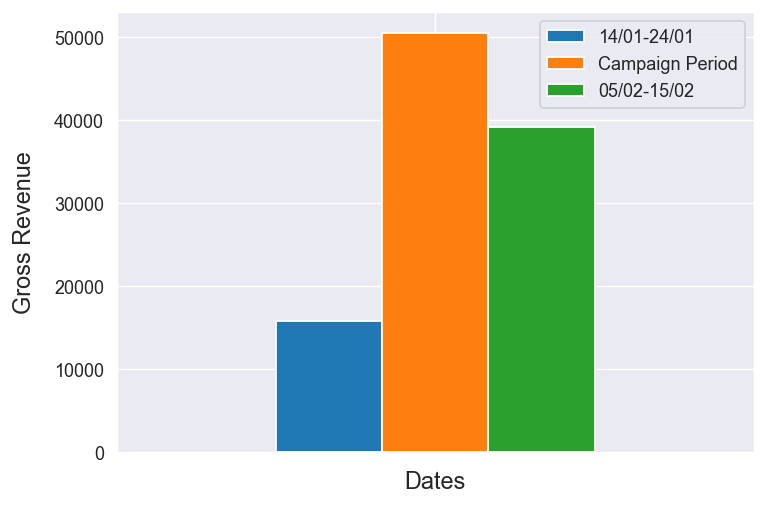

In [39]:
# Make the plot with better analysis
plt.rcParams['figure.dpi'] = 130

# Plot the data as a bar plot
gross_compared.plot(kind='bar')

plt.xlabel('Dates',fontsize = 13, fontfamily = 'Arial', labelpad = 10)
plt.ylabel('Gross Revenue',fontsize = 13, fontfamily = 'Arial', labelpad = 10)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Show the plot
plt.show()

## Visualizations

### Daily Gross Revenue
This is a line plot to visualize the trend of the total daily gross revenue over time, both during the campaign period and in the rest of the first two months of 2020 for the segmented group B, aged between 25-40 y.o. This plot would help us understand how the gross revenue has changed over time and identify any trends or patterns.

In [51]:
#Merge the whole activity with the customers from segment B for all the 
casino_total = pd.merge(casinos, customers_b, left_on='Casino_Customer_ID', right_on='Customer_ID')
casino_total['Gross Revenue'] = casino_total['Casino_Turnover'] - casino_total['Casino_Winnings']
casino_total_grouped = casino_total.groupby("Casino_DateCreation_ID")['Gross Revenue'].sum().reset_index(name='Daily Gross Revenue')


#Create variables with starting and ending day of the campaign
start_date = '2020-01-25'
end_date = '2020-02-04'

#Create date mask to have only the casino activity on the days between 25/01/2020 and 04/02/2020
linemask = (casino_total_grouped['Casino_DateCreation_ID'] >= start_date ) & (casino_total_grouped['Casino_DateCreation_ID'] <= end_date)

casinos_grouped_campaign = casino_total_grouped.loc[linemask]

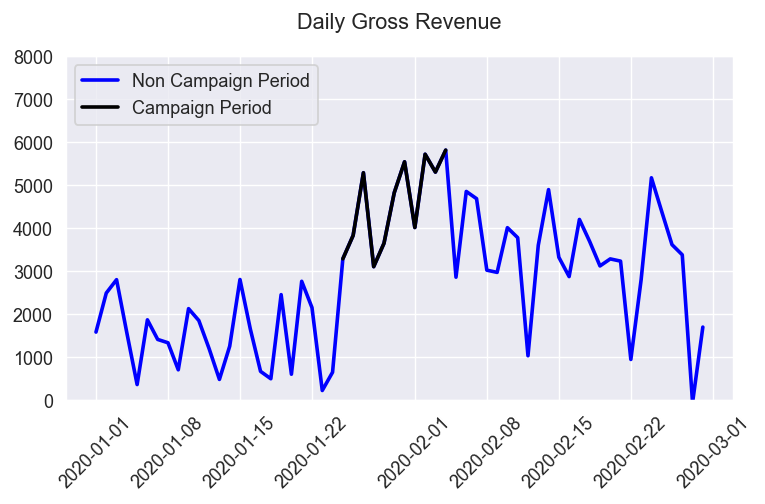

In [58]:
# Make the plot with better analysis
plt.rcParams['figure.dpi'] = 130

#Plot on the x axis the days and on the y axis the daily gross revenue
plt.plot(casino_total_grouped['Casino_DateCreation_ID'],casino_total_grouped['Daily Gross Revenue'],
         color='blue',linewidth=2,linestyle="-",label='Non Campaign Period')

plt.plot(casinos_grouped_campaign['Casino_DateCreation_ID'],casinos_grouped_campaign['Daily Gross Revenue'],
         color='black',linewidth=2,linestyle="-",label='Campaign Period')

#Rotate x ticks so they don't overlap
plt.xticks(rotation = 45)

#Set y limits
plt.ylim([0, 8000])

#Add figure title
plt.title('Daily Gross Revenue', y=1.05, loc='center')

plt.legend(loc ='upper left')


#Show the figure
plt.show()

### Number of Transactions


With this line plot we compare transactions before, during and after the campaign for the targeted group

In [29]:
casino_transactions_seg_b_grouped = casino_transactions_seg_b.groupby("Transaction_DateCreation_ID")['Transaction_Amount'].count().reset_index(name='Daily Transactions')

#Create date mask to have only the casino activity on the days between 25/01/2020 and 04/02/2020
linemask = (casino_transactions_seg_b_grouped["Transaction_DateCreation_ID"] >= start_date ) & (casino_transactions_seg_b_grouped ["Transaction_DateCreation_ID"] <= end_date)

casino_transactions_seg_b_campaign  = casino_transactions_seg_b_grouped.loc[linemask]

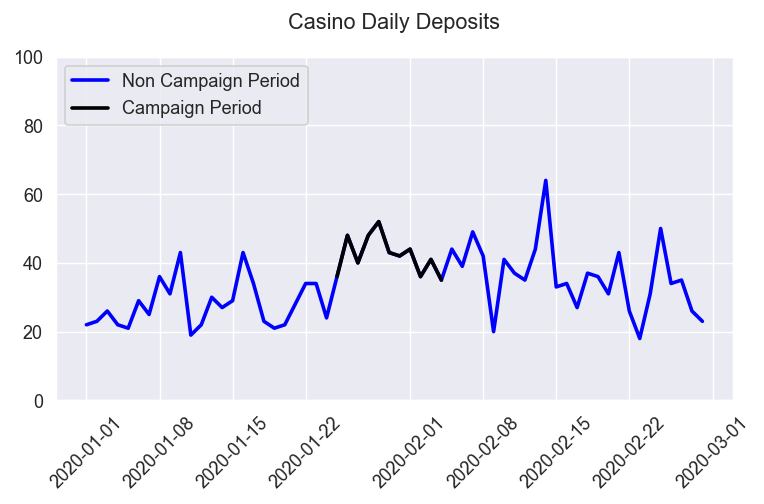

In [54]:
plt.rcParams['figure.dpi'] = 130

#Plot on the x axis the days and on the y axis the daily gross revenue
plt.plot(casino_transactions_seg_b_grouped["Transaction_DateCreation_ID"],casino_transactions_seg_b_grouped['Daily Transactions'],
         color='blue',linewidth=2,linestyle="-",label='Non Campaign Period')

plt.plot(casino_transactions_seg_b_campaign ["Transaction_DateCreation_ID"],casino_transactions_seg_b_campaign ['Daily Transactions'],
         color='black',linewidth=2,linestyle="-",label='Campaign Period')

#Rotate x ticks so they don't overlap
plt.xticks(rotation = 45)

#Set y limits
plt.ylim([0, 100])

#Add figure title
plt.title('Casino Daily Deposits', y=1.05, loc='center')

#Add legend
plt.legend(loc ='upper left')

#Show the figure
plt.show()

### Customer Age and Gross Revenue

This is a scatter plot that shows the relationship between customer age and gross revenue on the campaign period. This would allow us to see whether the campaign age span should have been more broad or smaller.

In [31]:
casino_campaign['Gross Revenue'] = casino_campaign['Casino_Turnover'] - casino_campaign['Casino_Winnings']
casino_campaign['birth_year'] = pd.DatetimeIndex(casino_campaign['Customer_Birthday_Date']).year
casino_campaign['age'] = 2020 - casino_campaign['birth_year']
grouped_age =  casino_campaign.groupby("age")['Gross Revenue'].sum().reset_index(name='Gross Revenue')

gr_mean = grouped_age['Gross Revenue'].mean()

gr_mean = round(gr_mean)

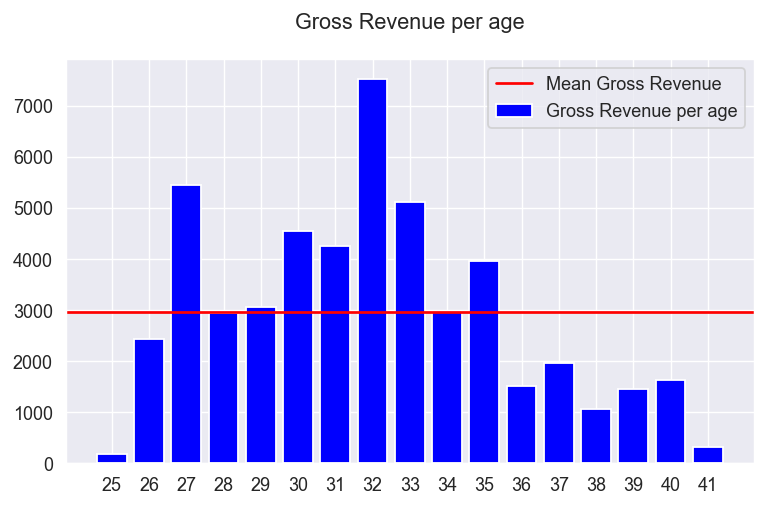

In [57]:
plt.rcParams['figure.dpi'] = 130

#Add figure title
plt.title('Gross Revenue per age', y=1.05, loc='center')

plt.bar(grouped_age['age'], grouped_age['Gross Revenue'], color ='blue', label = 'Gross Revenue per age')

plt.axhline(y = gr_mean, color = 'r', linestyle = '-', label = 'Mean Gross Revenue')

x=[i for i in range(25,42)]

plt.xticks(ticks = x)

#Add legend
plt.legend(loc ='upper right')

#Show the figure
plt.show()

Reasons for small gross revenue on 25 and 40 y.o are:
* we include 40 y.o and + 1 month customers, which are a few
* we include 25 y.o + days customers, which are a few

### Customer Visits Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

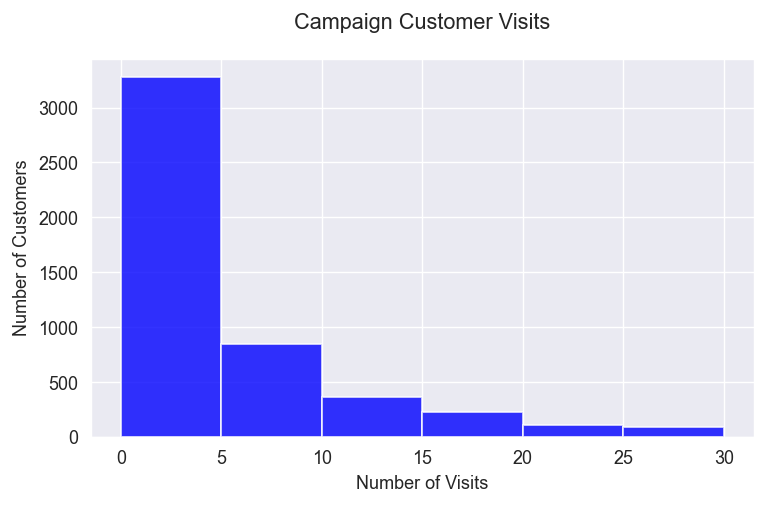

In [59]:
plt.rcParams['figure.dpi'] = 130

customer_visits['Customer Visits'].hist(bins=6, range=(0, 30), color='blue', alpha=0.8) 
plt.xlabel('Number of Visits')
plt.ylabel('Number of Customers')

#Add figure title
plt.title('Campaign Customer Visits', y=1.05, loc='center')

#Show the figure
plt.show

In [34]:
customer_revenue = casino_campaign.groupby(['Casino_Customer_ID','age'])['Gross Revenue'].sum().reset_index(name='Gross Revenue per customer')
customer_revenue

,Casino_Customer_ID,age,Gross Revenue per customer
0,3976250100,36,4.674129
1,3979337100,30,0.509591
2,3979421100,32,1.151578
3,3979561100,36,0.134826
4,3980996100,27,3.379843
...,...,...,...
5212,10574198100,38,0.516214
5213,10574373100,34,-1.950119
5214,10574478100,31,1.347568
5215,10575297100,30,3.717325


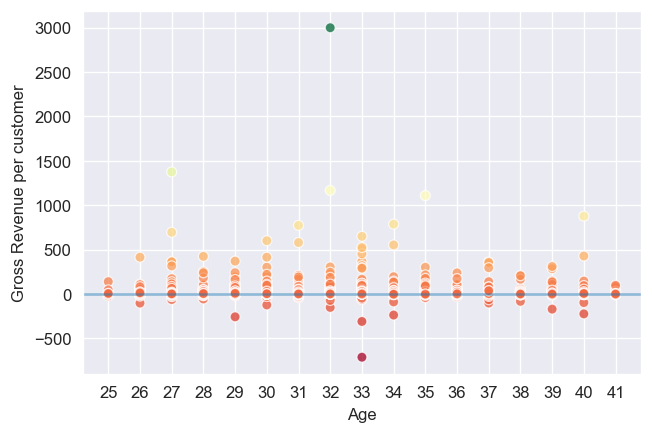

In [35]:
# Make the scatterplot with better analysis
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 120

sns.set_style('darkgrid')
ax = sns.scatterplot(data = customer_revenue, x='age', y='Gross Revenue per customer', 
                     hue = 'Gross Revenue per customer', palette = 'RdYlGn',alpha=0.75)

#Set label names.
ax.set(xlabel = 'Age', ylabel = 'Gross Revenue per customer')

plt.xticks(ticks = x)

#Drawing a horizontal line at point 0
plt.axhline(0, alpha = 0.5)

#Legend attributes.
plt.legend([],[], frameon=False)

plt.rcParams["figure.autolayout"] = True

In [60]:
conditions = [
    (customer_revenue['Gross Revenue per customer'] > 0),
    (customer_revenue['Gross Revenue per customer'] <= 0),]

values = ['Win', 'Lose']
customer_revenue['Outcome'] = np.select(conditions, values)

#Number of customers that generated positive gross revenue (WIN) vs negative (LOSE)
customer_revenue['Outcome'].value_counts()

Win     4773
Lose     444
Name: Outcome, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

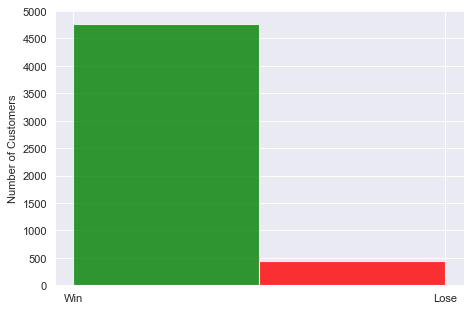

In [37]:
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 80

ax = customer_revenue['Outcome'].hist(bins=2, alpha=0.8, width = 0.5) 

plt.yticks(ticks = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.ylabel('Number of Customers')

ax.patches[0].set_facecolor('green')
ax.patches[1].set_facecolor('red')

#Show the figure
plt.show

## Futher analyses we can conduct

* Find the ROI: By analyzing the costs associated with the campaign (such as marketing and advertising expenses) and comparing it to the gross revenue generated during the campaign period, we can determine the return on investment for the campaign.


* Comparison to industry benchmarks: By comparing the performance of the casino during the campaign period to industry benchmarks, we can evaluate how well the casino performed compared to similar businesses in the industry.


* Cross-selling and upselling opportunities: By analyzing customer behavior data, we can determine if customers who participated in the campaign were more likely to try other services offered by the company, such as Sportsbook or Virtuals. This can provide insight into potential cross-selling and upselling opportunities.